### 2021_11_02_1

## Deep Learning Basic

In [17]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.__version__)

2.6.1


In [8]:
df = pd.DataFrame({"kor" : [50, 70, 80, 90, 100], 
                  "eng" : [70, 80, 90, 100, 70], 
                  "math" : [170, 220, 250, 280, 270]})

In [9]:
df

,kor,eng,math
0,50,70,170
1,70,80,220
2,80,90,250
3,90,100,280
4,100,70,270


In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
X = df[["kor", "eng"]]
y = df["math"]

model = LinearRegression()
model.fit(X, y)
print("가중치, y절편 :", model.coef_, model.intercept_)

가중치, y절편 : [2. 1.] -5.684341886080802e-14


In [14]:
new = [80, 85]
dat1 = pd.DataFrame({"kor": new})
dat1.shape

(2, 1)

* 이진분류 : 노드가 하나(확률이 나오면 0.5 기준으로 분류)
* 다항분류 : 노드가 세개(아이리스)
* 다항분류 : 노드가 10개(손글씨 예측)
* 회귀 : 노드가 하나

* 은닉층을 몇개로 할 것인가(선택가능)
* 각각의 은닉층의 노드 수는 얼마로 할 것인가(선택가능)

### 신경망을 위한 데이터 이해
* Tensor 자료형
* 스칼라 : 하나의 숫자만 담고 있는 텐서를 스칼라라고 한다.
    * 0차원 텐서, 0D텐서
* 벡터(1D텐서)
    * 숫자의 배열을 벡터(vector)또는 1D텐서라고 부른다. 1D 텐서는 딱 하나의 축을 가진다.
    * 5개의 원소를 가지고 있으므로 5차원 벡터라 부른다.
* 행렬(2D텐서)
    * 벡터의 배열을 행렬(matrix) 또는 2D텐서라 부른다. 
    * 행렬에는 2개의 축이 있다. 
    * 보통 행과 열이라 한다.
* 3D텐서와 고차원 텐서
    * 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있는 3D텐서가 만들어진다.
    * 3D텐서들을 하나의 배열로 합치면 4D텐서가 된다.
    * 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룬다.

In [26]:
# 스칼라, 0D텐서
x = np.array(12)
print(x)
print(x.ndim)  # 차원수
print(x.shape) # 행렬
print()

# 1D텐서
x = np.array([10, 20, 30, 40, 50])
print(x)
print(x.ndim)  # 차원수
print(x.shape) # 행렬
print()

# 2D텐서
x = np.array([[10, 20, 30], 
              [11, 21, 31], 
              [12, 22, 32]])
print(x)
print(x.ndim)  # 차원수
print(x.shape) # 행렬

x = np.array([
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ]
             ])
print(x)
print(x.ndim)
print(x.shape)


12
0
()

[10 20 30 40 50]
1
(5,)

[[10 20 30]
 [11 21 31]
 [12 22 32]]
2
(3, 3)
[[[11 21 31]
  [12 22 32]
  [13 23 33]]

 [[11 21 31]
  [12 22 32]
  [13 23 33]]

 [[11 21 31]
  [12 22 32]
  [13 23 33]]]
3
(3, 3, 3)


### MNIST 데이터 셋

In [27]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [28]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


### 이미지 출력

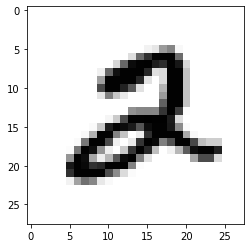

In [29]:
import matplotlib.pyplot as plt

image = train_images[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

### 넘파이를 활용한 텐서 조작
* 배열에 있는 특정 원소의 일부를 선택하는 것을 슬라이싱(slicing)이라 한다.

In [30]:
my_slice = train_images[10:50]
print(my_slice.shape)

my_slice = train_images[10:50, :, :]  # 이전것과 동일
print(my_slice.shape)

my_slice = train_images[10:50, 0:28, 0:28]  # 이전것과 동일
print(my_slice.shape)

(40, 28, 28)
(40, 28, 28)
(40, 28, 28)


### 이미지의 오른쪽 아래 14 x 14 픽셀 선택

(60000, 14, 14)


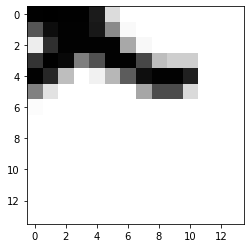

In [31]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

image = my_slice[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

### 배치 데이터
* 딥러닝 모델에서는 한 번에 전체 데이터를 처리하지 않는다.
* 그대신 데이터를 작은 배치(batch)로 나눈다.
* 구체적으로 말하면 MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.

In [33]:
batch = train_images[ : 128]
# 다음 배치
batch = train_images[128:256]
# n번째 배치
# batch = train_images[128 * n:128 * (n+1)]

### 텐서의 실제 사례
* 벡터 데이터(sample.features)크기의 2D텐서
* 시계열 데이터 또는 시퀀스 (sequence) 데이터 : (samples, timesteps, features)크기의 3D텐서
* 이미지(samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D텐서
* 동영상 : (samples, frames, height, width, channels) 또는 (sampels, frames, channels, height, width)크기의 5D텐서

### 이미지 데이터
* 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어진다.
* 흑백이미지의 channel의 차원 크기는 1입니다.
* 256 x 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)크기의 텐서
* 256 x 256 크기의 컬러 이미지에 대한 128개의 배치는 (128, 256, 256, 3)크기의 텐서

### 비디오 데이터
* 프레임의 연속 (frames, height, width, color_depth)의 4D텐서
* 여러 비디오의 배치(samples, frames, height, width, color_depth)의 5D텐서로 저장.

### 60초 짜리 144 x 256유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 된다.
* 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장.

### 텐서의 크기 변환

In [34]:
train_images = train_images.reshape((60000, 28*28))
train_images.shape

(60000, 784)

In [35]:
x = np.array( [[0. , 1.], 
               [2. , 3.],
               [4. , 5.]])
print(x.shape)

x1 = x.reshape((6,1))
x1.shape

(3, 2)


(6, 1)